<a href="https://colab.research.google.com/github/EbsHirani/StockMarketNews/blob/master/StockMarketNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 
os.chdir("drive/My Drive")
os.mkdir("StockMarketNews")
os.chdir("StockMarketNews")

In [0]:
os.chdir("data/datasets/aaron7sun/stocknews")

In [0]:
import pandas as pd
import numpy as np
cn = pd.read_csv("Combined_News_DJIA.csv")
cn["Date"] = pd.to_datetime(cn["Date"],format='%Y-%m-%d')
cn = cn.set_index("Date")
cn.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel c

In [0]:
cn["Top"] = ""
for i in cn.columns[1:-1]:
  cn["Top"] = cn["Top"] + cn[i]
  cn.drop(columns = [i], inplace= True)
cn.head()


,Label,Top
Date,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,1,b'Why wont America and Nato help us? If they w...
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,1,b'All the experts admit that we should legalis...


In [0]:
reddit = pd.read_csv("RedditNews.csv")
reddit["Date"] = pd.to_datetime(reddit["Date"],format='%Y-%m-%d')
reddit = reddit.set_index("Date")
reddit.head()

,News
Date,
2016-07-01,A 117-year-old woman in Mexico City finally re...
2016-07-01,IMF chief backs Athens as permanent Olympic host
2016-07-01,"The president of France says if Brexit won, so..."
2016-07-01,British Man Who Must Give Police 24 Hours' Not...
2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [0]:
reddit = reddit.sort_index()
reddit["News"] = reddit.groupby(by = reddit.index)["News"].transform(lambda x: ' '.join(x)).drop_duplicates()
reddit = reddit.drop_duplicates()
reddit.head()

,News
Date,
2008-06-08,"b'Marriage, they said, was reduced to the stat..."
2008-06-09,"b'Chew Qat: In Yemen, 72 per cent of men and 3..."
2008-06-10,b'31 year old beats 3 year old to death: worst...
2008-06-11,"b""Pakistan Blames U.S. Coalition for Troops' D..."
2008-06-12,"b'Marine ""Mean Motari"" gets expelled, another ..."


In [0]:
final_df = cn.merge(reddit,left_index= True, right_index= True )
final_df.head()

,Label,Top,News
Date,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'Georgian troops retreat from S. Osettain cap...
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Russia angered by Israeli military sale to G...
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,b'U.S. Beats War Drum as Iran Dumps the Dollar...
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""Bush announces Operation Get All Up In Russi..."
2008-08-14,1,b'All the experts admit that we should legalis...,b'Poland and US agree to missle defense deal. ...


In [0]:
final_df["Text"] = final_df["Top"] + final_df["News"]
final_df.drop(columns = ["Top", "News"], inplace = True)
final_df.head()

,Label,Text
Date,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,1,b'Why wont America and Nato help us? If they w...
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,1,b'All the experts admit that we should legalis...


Label 0 is for fall and 1 is for rise in the stock prices.

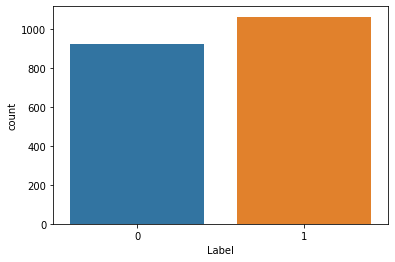

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "Label", data = final_df)


In [0]:
import nltk
# nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 
def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)

In [0]:
final_df["Text"] = final_df["Text"].astype(str)
final_df["Text"] = final_df["Text"].apply(preprocess)

In [0]:
final_df.head()

,Label,Text
Date,,
2008-08-08,0,b georgia down two russian warplan countri mov...
2008-08-11,1,b whi wont america nato help us If wont help u...
2008-08-12,0,b rememb ador 9 year old sang open ceremoni th...
2008-08-13,0,b U S refus israel weapon attack iran report b...
2008-08-14,1,b all expert admit legalis drug b war south os...


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df["Text"].values, final_df['Label'].values, test_size=0.10, random_state=42)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [0]:
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights']).tail()

,idf_weights
halloween,7.797382
hallelujah,7.797382
halla,7.797382
halfget,7.797382
zyklon,7.797382


In [0]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [0]:
BernModel = BernoulliNB()
BernModel.fit(x_train_tfidf, y_train)
print(f"Training Score : {BernModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {BernModel.score(x_test_tfidf, y_test)}")

Training Score : 0.9960893854748604
Test Score : 0.5376884422110553


In [0]:
LogModel = LogisticRegression()
LogModel.fit(x_train_tfidf,y_train)
print(f"Training Score : {LogModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {LogModel.score(x_test_tfidf, y_test)}")

Training Score : 0.9625698324022346
Test Score : 0.5628140703517588


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)
print(f"Training Score : {rf.score(x_train_tfidf, y_train)}")
print(f"Test Score : {rf.score(x_test_tfidf, y_test)}")

Training Score : 1.0
Test Score : 0.542713567839196


In [0]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier([('rf',rf), ('lr',LogModel),  ('bm',BernModel)])
voting.fit(x_train_tfidf,y_train)
print(f"Training Score : {voting.score(x_train_tfidf, y_train)}")
print(f"Test Score : {voting.score(x_test_tfidf, y_test)}")


Training Score : 0.9994413407821229
Test Score : 0.5326633165829145


Conclusion: Its very difficult to predict stock market movement only on the basis of news.